# Introduction to Pytorch

Pytorch อีกหนึ่งไลบรารี่มีมีความสำคัญมากๆของการสร้างโมเดล Neural network หรือ Deep learning ในปัจจุบัน Pytorch ถูกนำมาใช้ในหลากหลายงานวิจัยทั้งด้านกระประมวลผลภาษาธรรมชาติ (Natural language processing) และ Computer vision

Pytorch ถูกพัฒนาจากทีม Facebook's AI research (FAIR) และถูกนำมาประยุกต์ใช้ทั้งฝั่งวิชาการและฝั่งอุตสาหกรรม โดยมีข้อคือใช้งานได้ง่าย ปรับแต่งได้ง่าย และไม่ซับซ้อน

Pytorch มีลักษณะการใช้คล้ายคลึงกับ NumPy มากแต่ว่าใช้ tensor เป็นตัวกลางในการเก็บข้อมูล โดยข้อดีเพิ่มเติมคือ torch สามารถย้ายข้อมูล tensor ไปประมวลผลใน GPU ได้ และยังเปลี่ยนเป็น numpy array ได้อีกด้วย

ใน Notebook นี้เราจะไปรู้จักกับพื้นฐานของ Pytorch เพื่อให้เห็นภาพการใช้งานเบื้องต้น

In [ ]:
import torch # โหลด PyTorch

torch.cuda.is_available()  # ตรวจสอบว่ามี GPU และ CUDA หรือไม่

## Basic torch

เราสามารถสร้าง tensor ซึ่งเป็นตัวกลางเก็บข้อมูลหลักของ Pytorch ได้หลากหลายวิธี วิธีที่สะดวกที่สุดคือ `torch.tensor` แต่นอกจากนั้นยังสร้าง tensor ได้ด้วยวิธีอื่นๆ เช่น `torch.range`, `torch.zeros`, หรือ `torch.ones`

**Note:** Tensor โดยทั่วไปในทางคณิตศาสตร์และฟิสิกส์มีความหมายแตกต่างจาก tensor ที่ใช้ใน pytorch ซึ่งหมายถึง multidimensional array ของตัวเลขเท่านั้น

In [ ]:
a = torch.tensor([1., 2., 3.]) # สร้าง Tensor 1 มิติ จาก List

print(a) # แสดงผล Tensor
print(len(a)) # แสดงจำนวนสมาชิก
print(a.shape) # แสดงขนาดของ Tensor

tensor([1., 2., 3.])
3
torch.Size([3])


In [ ]:
Z = torch.zeros(3, 3) #  สร้าง tensor ขนาด 3x3 ที่มีค่าเป็น 0
print(Z) 

O = torch.ones(3, 4) #  สร้าง tensor ขนาด 3x4 ที่มีค่าเป็น 1
print(O)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [ ]:
a_r = torch.arange(0, 1, 0.2) # สร้าง tensor ที่มีค่าตั้งแต่ 0 ถึง 1 โดยเพิ่มทีละ 0.2

print(a_r)
print(len(a_r))

tensor([0.0000, 0.2000, 0.4000, 0.6000, 0.8000])
5


## Operations

เมื่อสร้าง tensor ขึ้นมาแล้วจะสามารถปฏิบัติการกับ tensor ที่สร้างขึ้นได้ เช่น การบวก ลบ คูณเมทริกซ์ และวิธีอื่นๆอีกมากมาย เช่น การเชื่อม tensor การแปลง dimension

In [ ]:
# รัน cell นี้เพื่อทดสอบการดำเนินการพื้นฐานของ Tensor
A = torch.tensor([[1., 3.], [4., -4.]]) # สร้าง tensor 2 มิติ จาก List ของ List
B = torch.tensor([[2., 7.], [-4., -2.]]) # สร้าง tensor 2 มิติ จาก List ของ List

print(A + B)  #  บวกตามตำแหน่ง (element-wise plus)
print(A - B)  #  ลบตามตำแหน่ง
print(A * B)  #  คูณค่าตามตำแหน่ง
print(A / B)  #  หารค่าตามตำแหน่ง

tensor([[ 3., 10.],
        [ 0., -6.]])
tensor([[-1., -4.],
        [ 8., -2.]])
tensor([[  2.,  21.],
        [-16.,   8.]])
tensor([[ 0.5000,  0.4286],
        [-1.0000,  2.0000]])


In [ ]:
print(A.mm(B))  # matrix multiplication(คูณเมตริกซ์), torch.mm(A, B)

tensor([[-10.,   1.],
        [ 24.,  36.]])


## Autograd

นอกจากนั้น `torch` ยังมี engine ที่ชื่อว่า Autograd ที่สามารถทำให้เราหา gradient ของฟังก์ชันจากตัวแปรที่กำหนดได้ ยกตัวอย่างเช่นถ้าเรามี $x = 1$ แล้วต้องการหา $df / dx$ ของฟังก์ชั่น $f(x) = x^2 - 10 x + 5$ จะสามารถเขียนด้วย Pytorch ได้ดังนี้:

In [ ]:
x = torch.tensor(1., requires_grad=True) # สร้าง Tensor 1 มิติ และกำหนดให้คำนวณ gradient ได้
f = x ** 2 - 10 * x + 5 # สร้างฟังก์ชัน f(x) = x^2 - 10x + 5 จาก Tensor x ที่สร้างข้างต้น
f.backward() # f'(x) = 2x - 10 คำนวณค่า gradient ของ f(x) ที่ x = 1 และเก็บไว้ใน x.grad โดยใช้ backpropagation algorithm ที่ PyTorch มีให้
x.grad  # เท่ากับ f'(1) = 2(1) - 10 = -8

tensor(-8.)

หลายๆคนอาจจะสงสัยว่าทำไมเราถึงต้องใช้ function autograd ในการ train neural network หากเราจำไปได้ในบทเรียนเรื่อง machine learning เป้าหมายในการ train model คือการทำให้ cost หรือ error ของ model ต่ำที่สุดเท่าที่เป็นไปได้ โดยการเลือก parameter ซึ่งเราจะเห็นว่าใน model ที่มีจำนวน parameter น้อย เช่น linear regression เราอาจจะลองแทนค่าหา slope ได้ แต่ neural network นั้นมีจำนวน parameter เยอะมาก จนการลองแทนค่าหา parameter ที่เหมาะสมทำได้ยาก ดังนั้นเราจึงมี algorithm ที่ช่วยในการปรับ parameter ที่เหมาะสม ที่มีชื่อว่า gradient descent
ถ้าเราลอง plot ความสัมพันธ์ระหว่าง parameter ต่างๆ กับ cost function เราก็จะเห็น graph ที่มีลักษณะคล้าย landscape โดยเป้าหมายของเราคือการไปถึงจุดที่มีค่าต่ำสุดใน landscape นั้น

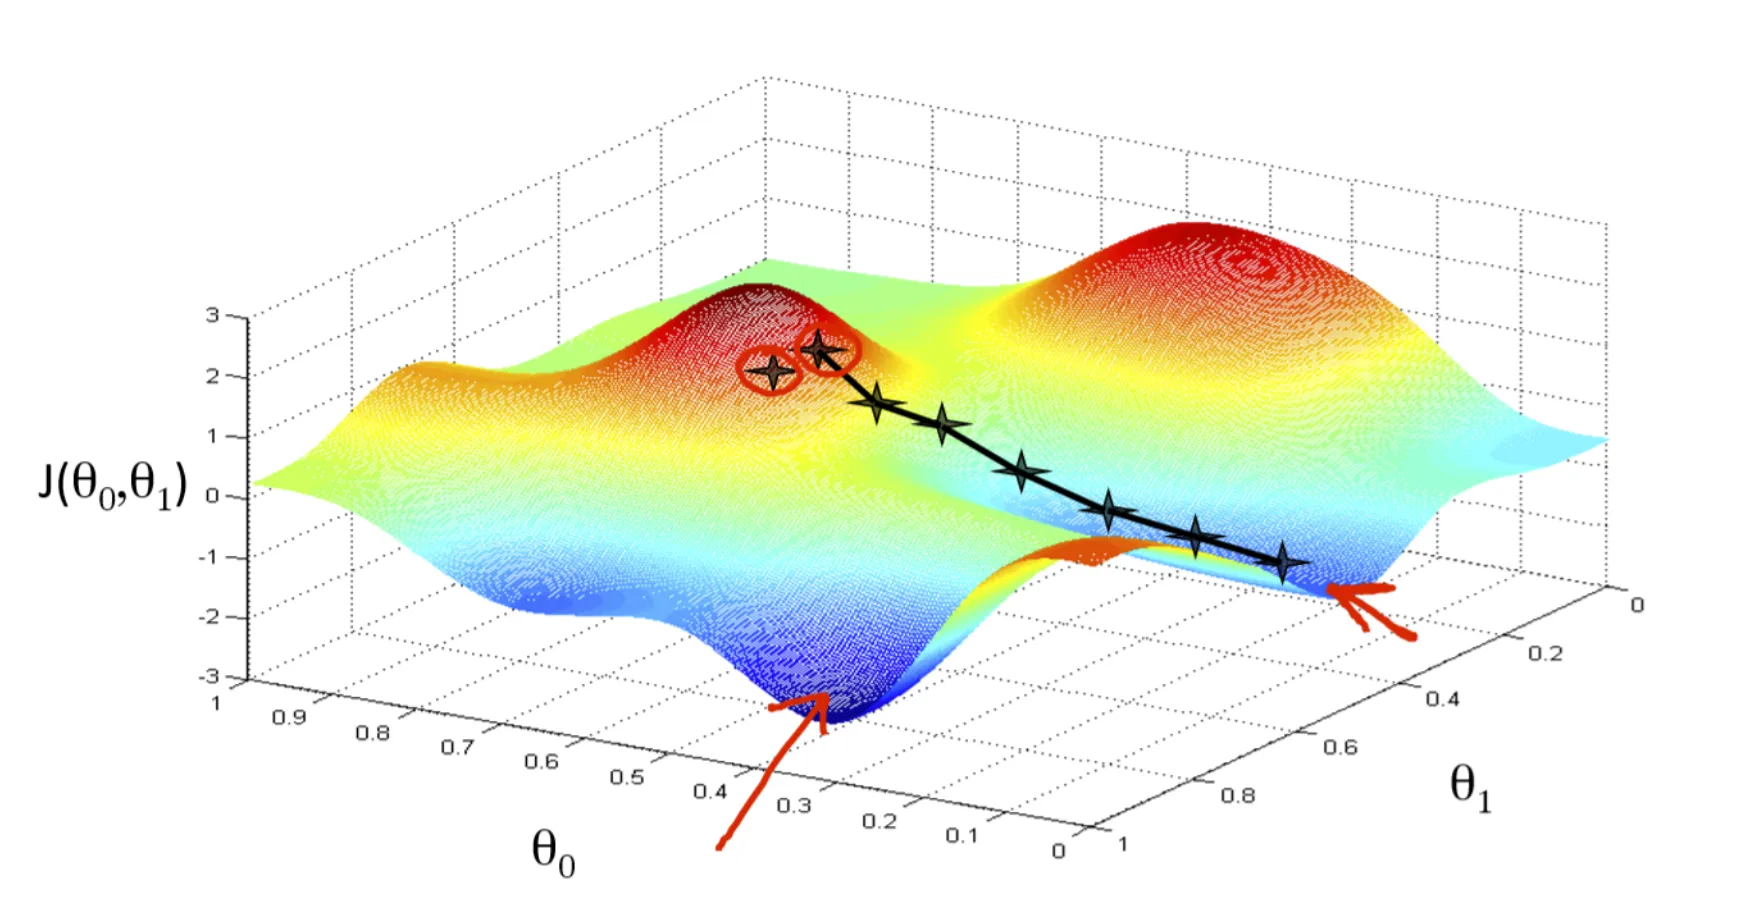

[ที่มา](https://towardsdatascience.com/an-intuitive-explanation-of-gradient-descent-83adf68c9c33)

ซึ่ง gradient descent จะเป็นตัวช่วยบอกเราว่าต่อไปเราควรปรับค่า parameter ไปในทิศทางไหนเพื่อให้เข้าใกล้จุดที่ cost function มีค่าต่ำสุดตามสมการดังรูป

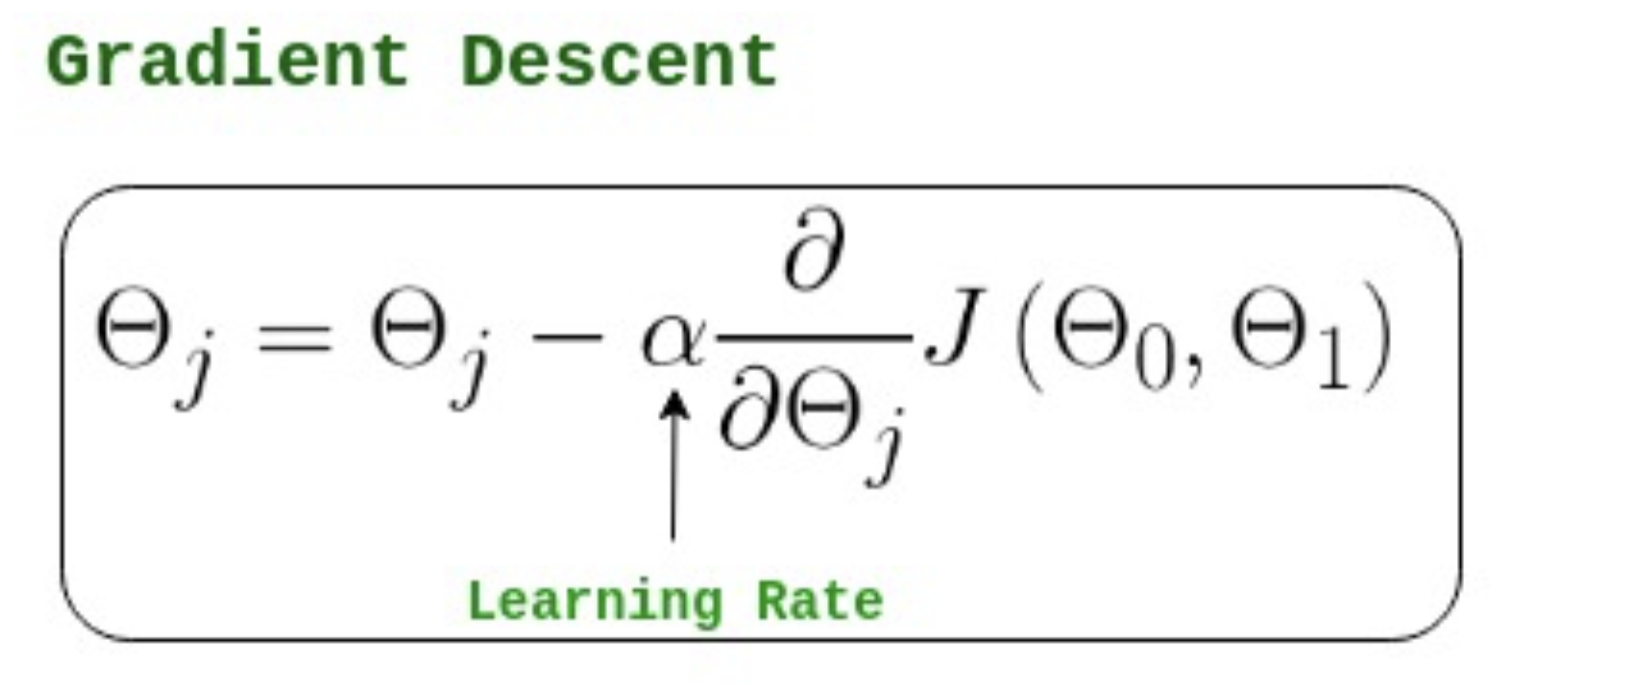

[ที่มา](https://www.geeksforgeeks.org/gradient-descent-in-linear-regression/)

โดย $\Theta_j$ คือ parameterตัวที่ j ใน model,  $J(\Theta)$ คือ cost function และ $\frac{\partial}{\partial \Theta_j }J(\Theta)$ คือ partial derivative ของ cost function ซึ่งเราคำนวณได้จาก function autograd และ $\alpha$  คือ learning rate ซึ่งเป็นตัวกำหนดว่าเราจะปรับค่า parameter ในแต่ละครั้งเยอะแค่ไหน 


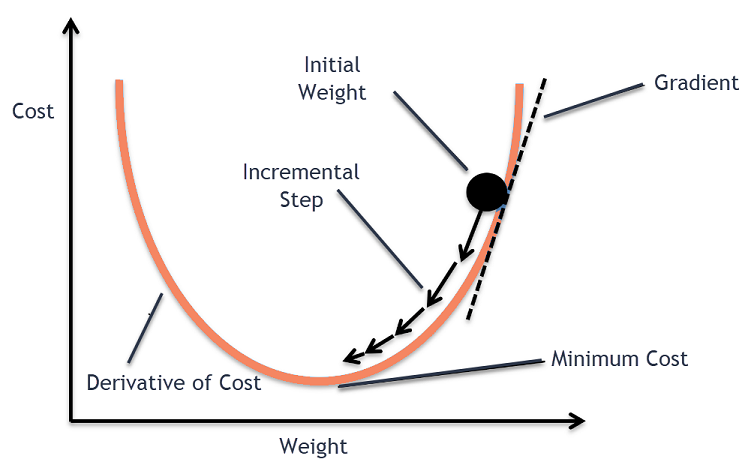

[ที่มา](https://www.analyticsvidhya.com/blog/2020/10/how-does-the-gradient-descent-algorithm-work-in-machine-learning/)

## **Neural Network Layers**

Pytorch มี Neural network layer แบบต่างๆที่เราสามารถดึงมาใช้และประกอบร่างให้เป็น Neural network ได้ นึกภาพตามง่ายๆคือ neural network layer เสมือนเป็น building block ของ Neural Network ก็ได้ โดยเราสามารถดึงเลเยอร์ต่างๆมาใช้ได้หลากหลายประเภท เช่น `nn.Linear`, `nn.Conv2d`, ... ในการสร้าง layer ขึ้นมาพารามิเตอร์จะถูกสุ่มในตอนที่สร้าง แต่เมื่องเราเทรนโมเดลด้วยชุดข้อมูลที่ป้อนให้ neural network และทำการอัพเดทพารามิเตอร์ ค่าเหล่านี้จะถูกปรับให้ถูกใช้งาน

โดยทั่วไป Pytorch จะให้ input dimension แรกของ layer เป็น batch size และขนาดของ input และ output เมื่อผ่าน layer จะขึ้นอยู่กับเลเยอร์ที่เราเลือก ยกตัวอย่างเช่น `nn.Linear(5, 3)` จะรับ input ที่มีขนาด 5 และ output ขนาด 3 ดังนั้น ถ้าเรามีข้อมูลตารางที่มี 10 แถว (batch size = 10) 5 features (columns) หรือขนาด 10 x 5 เมื่อผ่าน Linear layer ก็จะได้ขนาดออกมาเป็น 10 x 3 ตัวอย่างด้านล่างเราจะลองสร้างข้อมูลตามที่อธิบายเพื่อป้อนให้ Linear layer ที่เราสร้างขึ้น

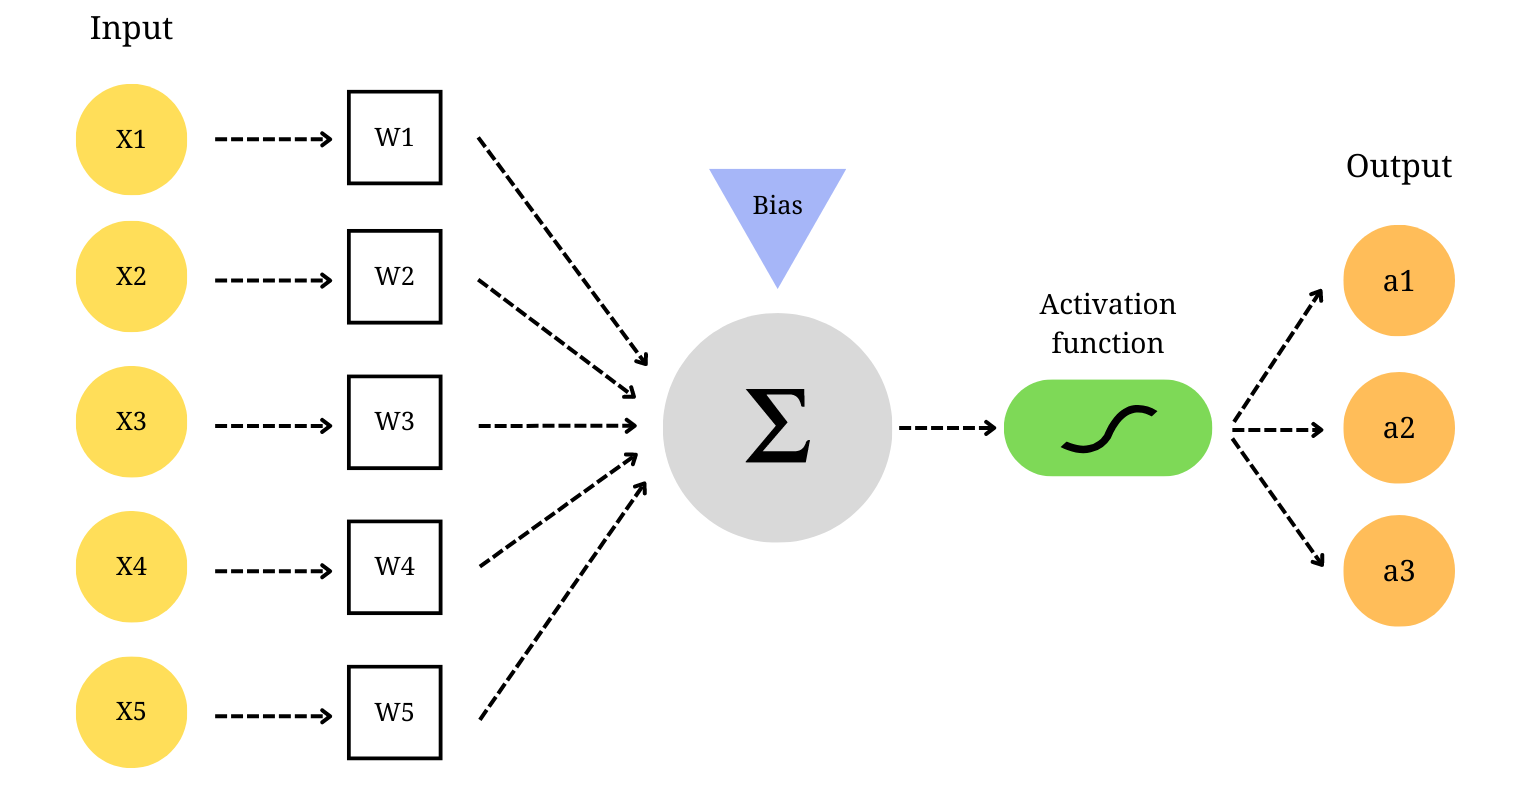

ซึ่งเขียนเป็น linear function ได้ดังนี้

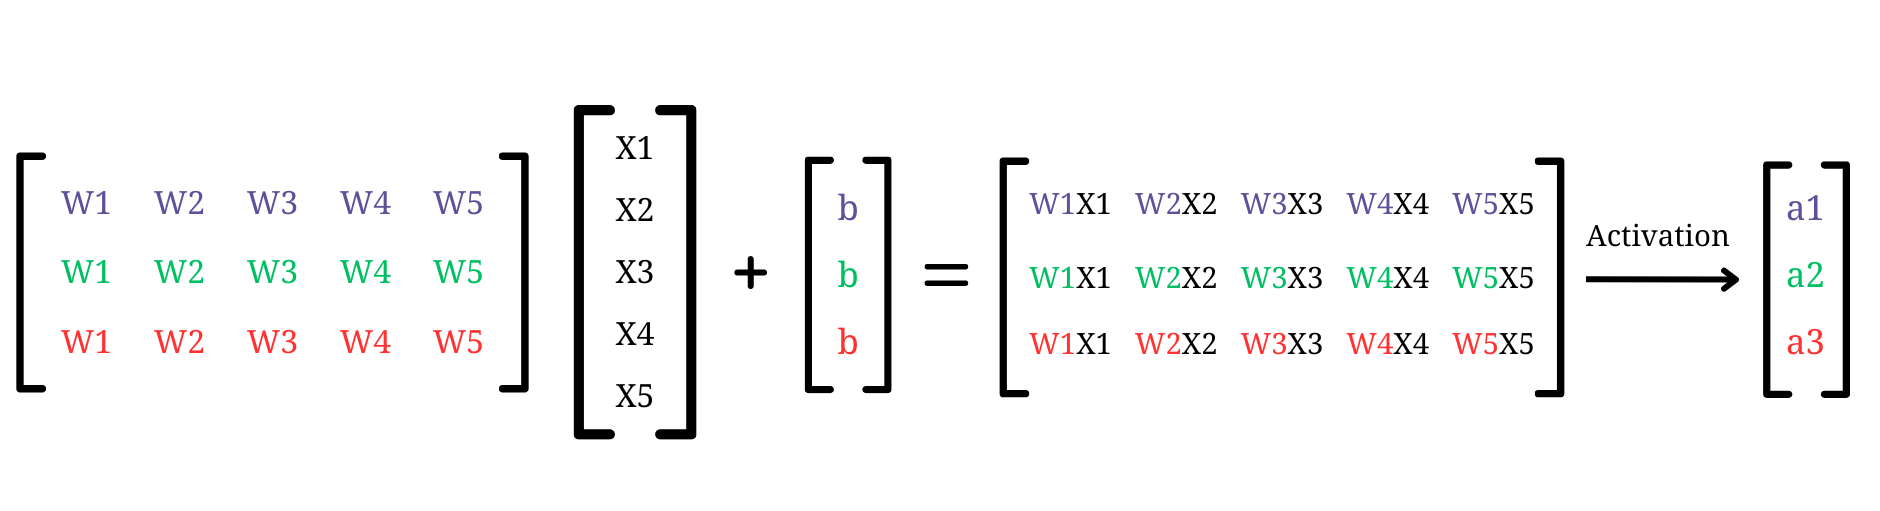

จะเห็นว่ามี input features ทั้งหมด 5 features(x1, x2, …, x5) และเมื่อนำไปผ่าน linear function ดังแสดง จะได้ output ออกมาเป็น 3 features ใหม่(a1, a2, a3) ซึ่งจะถูกส่งไปยัง neuron ตัวต่อไปใน network 

โดย weight(W1, W2.., W5) จะเปรียบเหมือนตัวบอกความสำคัญของแต่ละ feature โดย weight นี้เป็นหนึ่งในพารามิเตอร์ที่ถูกสุ่มมาตอนแรก และจะถูกปรับเมื่อโมเดลได้รับการเทรนไปเรื่อย ๆ ตาม output ที่ได้ในแต่ละครั้งจนกว่าจะได้ output ที่ทำให้ loss function น้อยที่สุด หรือตรงกับ label จริงมากที่สุดนั่นเอง (รายละเอียดเพิ่มเติมจะแสดงในส่วน Training Model ต่อไป)

In [ ]:
import torch # โหลด PyTorch
import torch.nn as nn # โหลด module ที่เกี่ยวข้องกับการสร้าง Neural Network โดย module nn จะมีคลาสที่เกี่ยวข้องกับการสร้าง layer ต่างๆ ของ Neural Network

fc = nn.Linear(5, 3) # สร้าง fully-connected layer ที่มีจำนวน input = 5 และ output = 3
x = torch.randn(10, 5) # สร้าง Tensor ขนาด 10x5 ที่มีค่าเป็นเลขสุ่ม
print(x) # แสดง Tensor
print("Shape of input = ", x.shape) # แสดงขนาดของ Tensor
x_out = fc(x) # ส่งค่า Tensor x ที่สร้างข้างต้นผ่าน fully-connected layer ที่สร้างไว้ และเก็บผลลัพธ์ไว้ใน x_out
print(x_out) # แสดงผลลัพธ์
print("Shape of output = ", x_out.shape) # แสดงขนาดของ Tensor ที่ผ่าน layer แล้ว

tensor([[ 0.5322, -0.3053,  0.1043, -0.4919, -1.1238],
        [ 1.0170,  0.0496, -0.2312, -0.9472, -2.2531],
        [ 0.5595,  0.5000,  0.2074, -1.9459, -0.5302],
        [-0.6784,  0.8662,  0.4673, -0.2919,  0.3568],
        [-1.3785,  1.5481,  1.6534,  1.2843,  0.9978],
        [-0.6092,  0.5994,  0.3895,  0.2247,  1.0194],
        [ 1.1571, -0.0898, -0.6605,  1.0379,  0.9274],
        [ 0.8768,  0.9874, -0.1047,  1.3554,  0.2071],
        [ 0.5120, -0.5372,  1.0576,  1.5728,  0.5447],
        [ 0.5920, -0.3496, -2.1315,  1.0193,  0.9318]])
Shape of input =  torch.Size([10, 5])
tensor([[-0.0368, -0.2593,  0.5598],
        [-0.5351, -0.4155,  0.7522],
        [-0.5084,  0.5320,  0.6902],
        [-0.3991,  0.4646,  0.3325],
        [-0.4004, -0.0218, -0.3860],
        [ 0.1429,  0.5252,  0.1787],
        [ 1.3860,  0.2824,  0.0411],
        [ 0.5697, -0.0696, -0.1828],
        [ 1.1702, -0.6703, -0.3447],
        [ 1.3835,  0.8544,  0.6054]], grad_fn=<AddmmBackward0>)
Shape of outpu

เราสามารถนำ layer ต่างๆมาประกอบร่างกันด้วยการสร้าง class `nn.Module` ได้ ยกตัวอย่างถ้าเราต้องการสร้าง neural network ที่มี 2 layer ที่ประกอบด้วย layer แรกที่รับฟีเจอร์ขนาด 5 และได้ผลออกมาเป็นฟีเจอร์ขนาด 3 ถัดมาคือการนำฟีเจอร์ขนาด 3 และได้ผลออกมาเป็นฟีเจอร์ขนาด 1 เพื่อนำไปใช้ต่อ จะเขียนได้ดังนี้

In [ ]:
import torch.nn as nn
import torch.nn.functional as F # โหลด module ที่เกี่ยวข้องกับการสร้าง Neural Network โดย module nn.functional จะมีฟังก์ชันที่เกี่ยวข้องกับการสร้าง layer ต่างๆ ของ Neural Network

# สร้างคลาส Net ที่โดยใช้ต้นแบบจากคลาส nn.Module
class Net(nn.Module):
    # สร้าง Neural Network ที่มี 2 Linear layer
    def __init__(self): # สร้าง constructor ซึ่งทำหน้าที่เป็นฟังก์ชันสำหรับสร้าง object จาก class Net 
        super().__init__() # เรียก constructor ของคลาสแม่ (nn.Module) เพื่อ initialize ค่าต่างๆ และนำ method ตั้งต้นของ nn.Module มาใช้งาน
        self.fc1 = nn.Linear(5, 3) # สร้าง fully-connected layer ที่มีจำนวน input = 5 และ output = 3 ชื่อ fc1
        self.fc2 = nn.Linear(3, 1) # สร้าง fully-connected layer ที่มีจำนวน input = 3 และ output = 1 ชื่อ fc2

    # สร้าง forward porpagation ของ Neural Network โดยที่ input คือ Tensor x และ output คือ Tensor ที่ผ่าน layer ทั้ง 2 ชั้น โดยมีลำดับดังนี้
    # 1. ผ่าน fully-connected layer ชั้นที่ 1 (fc1)
    # 2. ผ่านฟังก์ชัน activation ชั้นที่ 1 (ReLU)
    # 3. ผ่าน fully-connected layer ชั้นที่ 2 (fc2)
    # 4. output ค่าที่ได้
    def forward(self, x): # สร้าง forward propagation ของ Neural Network โดยที่ forward เป็น method ที่เราต้องสร้างเอง และเป็นสิ่งที่ต้องมีสำหรับคลาสที่สร้างจาก nn.Module ด้วย
        x = F.relu(self.fc1(x)) # ผ่าน fully-connected layer ชั้นที่ 1 และผ่านฟังก์ชัน activation ชั้นที่ 1 (ReLU)
        x = self.fc2(x) # ผ่าน fully-connected layer ชั้นที่ 2
        return x # คืนค่า output ที่ได้

จะเห็นว่าหลังจากผ่าน Linear layer แล้ว เราจะนำไปประกบกับ activation function ต่อเพื่อ transform ให้ output มีลักษณะเป็น non-linear ก่อนที่จะส่งไปยัง layer ต่อไป เพราะถ้าไม่มี activation function โมเดลของเราก็จะเป็นแค่ linear function ธรรมดา ทำให้ไม่สามารถเรียนรู้อะไรที่ซับซ้อนได้

จากนั่นเราจะสามารถสร้างชุดข้อมูลเล่นๆ เช่น x ที่มีขนาด 4 x 5 หรือ batch size = 4 และมี 5 ฟีเจอร์ เพื่อทดลองป้อนเข้าไปในโมเดลได้ โดยดังที่กล่าวไปข้างต้น การสร้างโมเดลนี้ยังไม่ได้รวมการเทรนพารามิเตอร์ของโมเดล สำหรับผู้ที่เริ่มต้น สามารถทดลองสร้างโมเดลและป้อนชุดข้อมูลสุ่มเพื่อทดลองว่ามิติของข้อมูลที่เราเตรียมสามารถใส่เข้าไปใน neural network ที่เราสร้างขึ้นได้หรือไม่

In [ ]:
net = Net() # สร้าง object จากคลาส Net ที่สร้างข้างต้น

# สร้าง input ขนาด 4x5 ที่มีค่าเป็นเลขสุ่ม
x = torch.randn(4, 5) 
x_out = net(x) # ส่ง input ผ่าน Neural Network ที่สร้างข้างต้น และเก็บผลลัพธ์ไว้ใน x_out
# แสดงผลลัพธ์
print("Input x: \n", x) 
print("Input shape = ", x.shape)
print("Output from network x_out: \n", x_out)
print("Output shape = ", x_out.shape)

Input x: 
 tensor([[-1.6471,  1.7493, -0.0529,  0.5742, -2.1234],
        [-1.5412, -0.7041, -1.1932, -0.1249,  0.6539],
        [-0.0605, -0.3132, -0.3388,  0.3613, -0.4370],
        [ 0.3344, -0.4876, -0.8606, -0.3700, -1.5940]])
Input shape =  torch.Size([4, 5])
Output from network x_out: 
 tensor([[-0.1010],
        [ 0.2171],
        [ 0.3244],
        [ 0.3286]], grad_fn=<AddmmBackward0>)
Output shape =  torch.Size([4, 1])


## **Put it all together**

หลังจากที่เราได้ทดลองสร้างโมเดลเป็นที่เรียบร้อย ขั้นตอนถัดไปประกอบด้วย

- การเตรียมชุดข้อมูล เตรียมชุดข้อมูลเพื่อป้อนให้ neural network
- การเทรนโมเดล ทำการป้อนข้อมูลให้ neural network สำหรับใช้ในการเรียนพารามิเตอร์ของโมเดล


<br><br>
**ผู้จัดเตรียม code ใน tutorial**: ดร. ฐิติพัทธ อัชชะกุลวิสุทธิ์